# Atividades

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


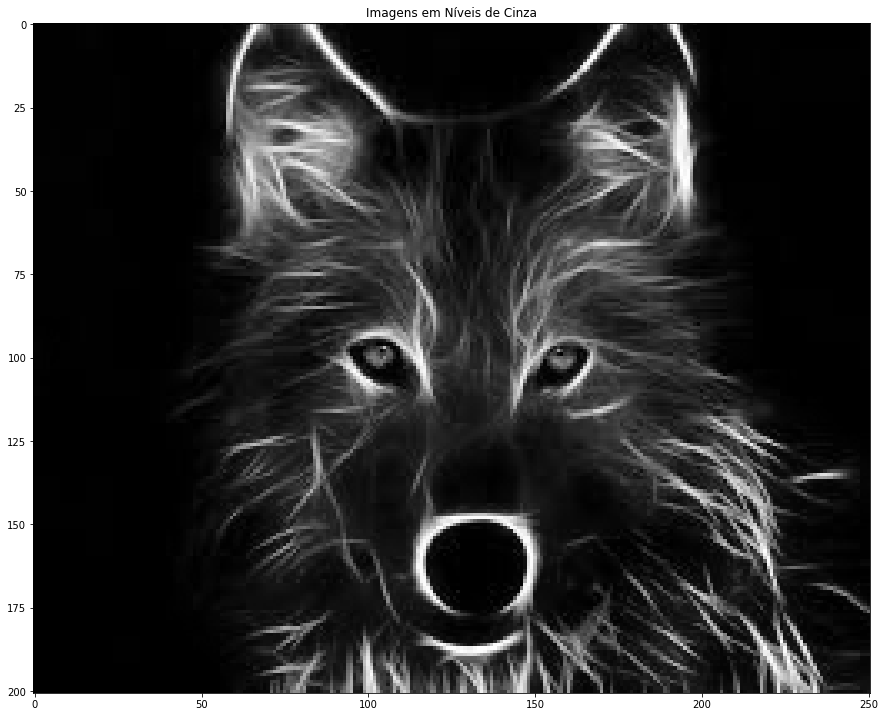

In [1]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

imagem = imread('c1.jpg')

nvlcinza = rgb2gray(imagem)

plt.figure(figsize=(15,30))
plt.imshow(nvlcinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

imsave('aula_visao.jpg',nvlcinza)

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

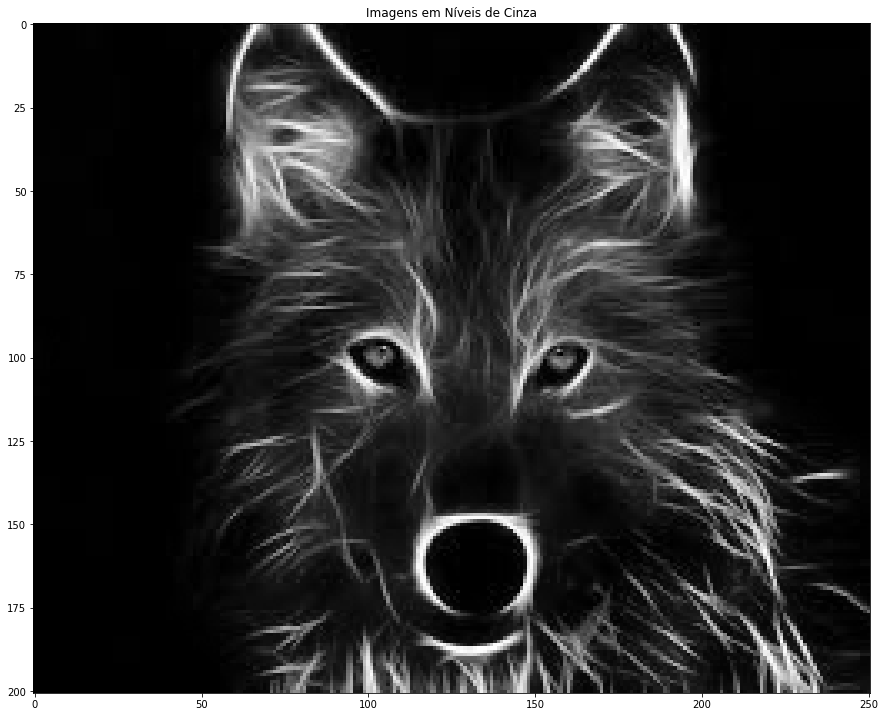

In [2]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

imagem = imread('c1.jpg')

nvlcinza = rgb2gray(imagem)

linhas,colunas= nvlcinza.shape

for l in range(linhas):
    for c in range(colunas):
        if (c+1 < colunas):
            if (nvlcinza[l,c] == nvlcinza[l,c+1]):
                imagem[l,c] = 0

plt.figure(figsize=(15,30))
plt.imshow(nvlcinza,cmap = 'gray')
plt.title('Imagens em Níveis de Cinza')
imsave("foto.png",nvlcinza)

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [3]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imagem2 = imread('c1.jpg')

red = imagem2[:,:,0] ## 1 pixel tem 3 valores
green = imagem2[:,:,1] ## toodos os canais de cores separados, todas as linhas e colunas de cada cor quando separa o rgb, cada camada vira nivel de cinza
blue = imagem2[:,:,2]


redmin = red.min()
redmax =  red.max()
greenmin = green.min()
greenmax = green.max()
bluemin = blue.min()
bluemax = blue.max()

print(redmin)
print(redmax)
print(greenmin)
print(greenmax)
print(bluemin)
print(bluemax)



0
255
0
255
0
255


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

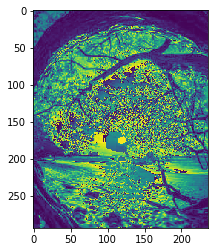

In [9]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

imagem2 = imread('imagem3.jpg')

red = imagem2[:,:,0] ## 1 pixel tem 3 valores
green = imagem2[:,:,1] ## toodos os canais de cores separados, todas as linhas e colunas de cada cor quando separa o rgb, cada camada vira nivel de cinza
blue = imagem2[:,:,2]

linhas,colunas= red.shape

for l in range(linhas):
    for c in range(colunas):
         if (red[l,c] > 150):
                red[l,c] = 255
                
linhas,colunas= green.shape

for l in range(linhas):
    for c in range(colunas):
         if (green[l,c] > 150):
                green[l,c] = 255
            
linhas,colunas= blue.shape

for l in range(linhas):
    for c in range(colunas):
         if (blue[l,c] > 150):
                blue[l,c] = 255
            
            
image = (red+blue+green)
imsave("foto.png",image)
plt.imshow(image)


5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’,‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

In [1]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.util import random_noise
import numpy as np
import cv2
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet,denoise_nl_means)
%matplotlib inline

img = cv2.imread('imagem3.jpg')
 

noise_img1 = random_noise(img, mode='gaussian') 
noise_img2 = random_noise(img, mode='s&p',amount=0.3)
noise_img3 = random_noise(img, mode='speckle')


cv2.imshow('1',noise_img1)
cv2.imshow('2',noise_img2)
cv2.imshow('3',noise_img3)


rgaussian = denoise_tv_chambolle(noise_img1)
rsp = denoise_bilateral(noise_img2)
respeckle = denoise_wavelet(noise_img3)

cv2.imshow('1.1',rgaussian)
cv2.imshow('1.2',rsp)
cv2.imshow('1.3',respeckle)

cv2.waitKey(0)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:78: UserWarning: denoise_bilateral will default to multichannel=False in v0.15
  warn('denoise_bilateral will default to multichannel=False in v0.15')


-1

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

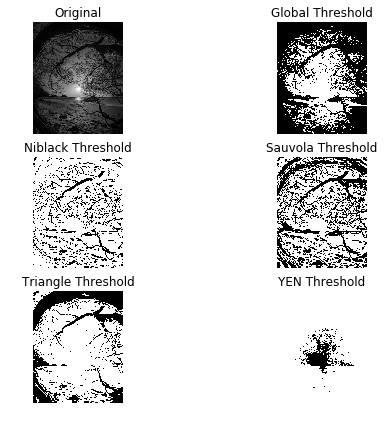

In [17]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola,threshold_triangle,threshold_yen)
,

 
imagem = imread('imagem3.jpg')
image = rgb2gray(imagem)
binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_triangle = threshold_triangle(image)
thresh_yen = threshold_yen(image)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_triangle = image > thresh_triangle
binary_yen = image <= thresh_yen

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_triangle, cmap=plt.cm.gray)
plt.title('Triangle Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_yen, cmap=plt.cm.gray)
plt.title('YEN Threshold')
plt.axis('off')

plt.show()

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

(-0.5, 235.5, 293.5, -0.5)

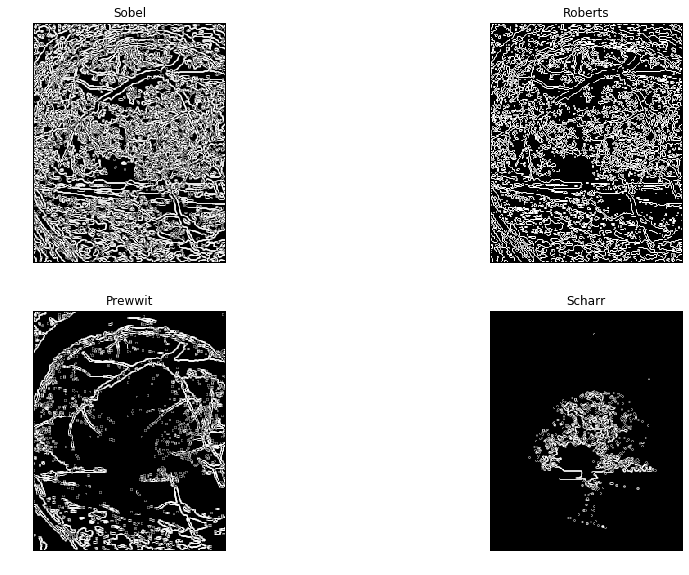

In [8]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.data import page
from skimage.filters import sobel,roberts,prewitt,scharr
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola,threshold_triangle,threshold_yen)
,

 
imagem = imread('imagem3.jpg')
image = rgb2gray(imagem)
binary_global = image > threshold_otsu(image)



thresh_niblack = threshold_niblack(image)
thresh_sauvola = threshold_sauvola(image)
thresh_triangle = threshold_triangle(image)
thresh_yen = threshold_yen(image)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_triangle = image > thresh_triangle
binary_yen = image <= thresh_yen

contorno1 = sobel(binary_niblack)
contorno2 = roberts(binary_sauvola)
contorno3 = prewitt(binary_triangle)
contorno4 = scharr(binary_yen)

plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.imshow(contorno1,cmap = 'gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Roberts')
plt.imshow(contorno2,cmap = 'gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(contorno3,cmap = 'gray')
plt.title('Prewwit')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(contorno4,cmap = 'gray')
plt.title('Scharr')
plt.axis('off')









8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

In [2]:
from skimage.io import imsave,imread,imshow
from numpy import zeros

img = imread("imagem2.jpg")

red = img[:,:,0]
blue = img[:,:,1]
green = img[:,:,2]

if red.mean() > blue.mean() and red.mean() >green.mean():
    maior = red
elif blue.mean() > red.mean() and blue.mean() >green.mean():
    maior = blue
else:
    maior = green

linha, coluna= maior.shape
x = 0
y = 0
dvM = 0
padrao = zeros(10, dtype = int) 

for l in range(linha-1):
    for c in range(coluna-1):
        padrao[1] = (maior[l+1][c+1])
        padrao[2] = (maior[l+1][c-1])
        padrao[3] = (maior[l+1][c])
        padrao[4] = (maior[l][c+1])
        padrao[5] = (maior[l][c])
        padrao[6] = (maior[l][c-1])
        padrao[7] = (maior[l-1][c+1])
        padrao[8] = (maior[l-1][c])
        padrao[9] = (maior[l-1][c-1])
        
        if padrao.std() > dvM:
            x = l
            y = c

corteX = int(linha/4)
cortey = int(coluna/4)

print(corteX,cortey)
print(linha,coluna)
print(x,y)

while(x+corteX>linha):
    x-=1
while (x-corteX <= 0):
    x+=1
while(y+cortey>linha):
    y-=1
while (y-cortey <= 0):
    y+=1


recorte_imagem = maior[x:x+corteX,y:y+cortey]
imsave("corte.png",recorte_imagem)

print(x,y)

56 56
225 225
223 223
169 169
